#### 작성일 : 19/7/21
#### 목적 : 데이터 컬럼 별 분포/특징점 파악 

### 0 . load libraies & data import 

In [6]:
library(data.table)
library(ggplot2)
library(dplyr)
options(repr.plot.width = 5, repr.plot.height = 3)
options(scipen = 100)
library(ggpubr)

Loading required package: magrittr


In [10]:
tr <- fread("/Users/jeong/IEEE-Fraud-Detection/input/train_transaction.csv")
te <- fread("/Users/jeong/IEEE-Fraud-Detection/input/test_transaction.csv")

tr_id <- fread("/Users/jeong/IEEE-Fraud-Detection/input/train_identity.csv")
te_id <- fread("/Users/jeong/IEEE-Fraud-Detection/input/test_identity.csv")

In [11]:
dim(tr)
dim(te)

dim(tr_id)
dim(te_id)

[1] 590540    394

[1] 506691    393

[1] 144233     41

[1] 141907     41

In [12]:
te$isFraud = -1
tt <- rbind(tr, te)

In [13]:
head(tr)

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,⋯,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
<int>,<int>,<int>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2987000,0,86400,68.5,W,13926,NA,150,discover,142,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2987001,0,86401,29.0,W,2755,404,150,mastercard,102,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2987002,0,86469,59.0,W,4663,490,150,visa,166,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2987003,0,86499,50.0,W,18132,567,150,mastercard,117,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2987004,0,86506,50.0,H,4497,514,150,mastercard,102,⋯,0,0,0,0,0,0,0,0,0,0
2987005,0,86510,49.0,W,5937,555,150,visa,226,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [14]:
head(tr_id)

TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,⋯,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2987004,0,70787,NA,NA,NA,NA,NA,NA,NA,⋯,samsung browser 6.2,32,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987008,-5,98945,NA,NA,0,-5,NA,NA,NA,⋯,mobile safari 11.0,32,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2987010,-5,191631,0,0,0,0,NA,NA,0,⋯,chrome 62.0,NA,,,F,F,T,T,desktop,Windows
2987011,-5,221832,NA,NA,0,-6,NA,NA,NA,⋯,chrome 62.0,NA,,,F,F,T,T,desktop,
2987016,0,7460,0,0,1,0,NA,NA,0,⋯,chrome 62.0,24,1280x800,match_status:2,T,F,T,T,desktop,MacOS
2987017,-5,61141,3,0,3,0,NA,NA,3,⋯,chrome 62.0,24,1366x768,match_status:2,T,F,T,T,desktop,Windows


### 1. Target 분포 확인

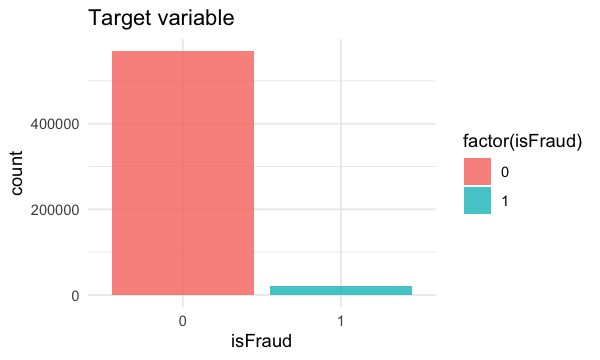

In [15]:
ggplot(tr, aes(factor(isFraud), fill = factor(isFraud))) + geom_bar(alpha = 0.8)  + theme_minimal() +
    ggtitle("Target variable") + labs(x = "isFraud")

매우 imbalance한 Target 분포

### 2. TransactionDT

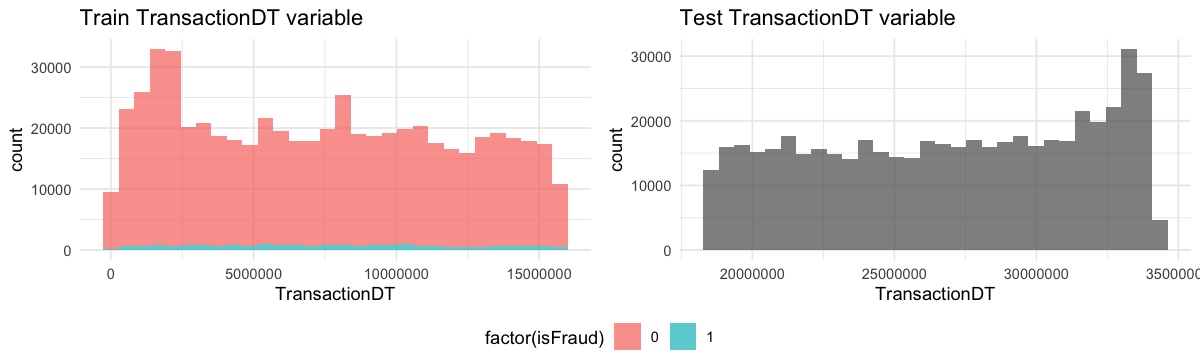

In [18]:
a1  <- ggplot(tr, aes(TransactionDT, fill = factor(isFraud))) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Train TransactionDT variable") + labs(x = "TransactionDT") + theme(legend.position = "bottom")

b1 <- ggplot(te, aes(TransactionDT)) + geom_histogram(alpha = 0.7, bins = 30)  + theme_minimal() +
    ggtitle("Test TransactionDT variable") + labs(x = "TransactionDT")

theme_set(theme_pubr())
options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 2)
figure

TransactionDT 컬럼을 본 결과 두가지 특이점을 확인했다.

2.1) Train/Test 데이터는 시간 순으로 완벽하게 분리되어있다.
즉, TransactionDT 변수는 Test dataset 모델 예측에 도움이 되지 못할것이며, validation 데이터셋을 정하는대에도 이 점을 늘 염두해 두어야 할것이다.

2.2) 두 데이터 모두 치솟는 구간(peak)이 존재하며, 데이터 상에서 peak이 나오는 패턴이 서로 다른데,

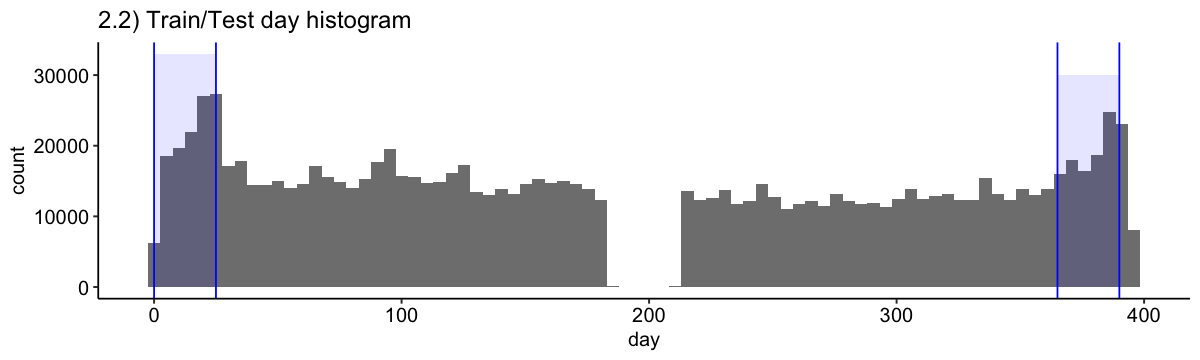

In [19]:
tt$day  <- tt$TransactionDT / 60 / 60 / 24
ggplot(tt, aes(day)) + geom_histogram(bins = 80, alpha = 0.8) +
    ggtitle("2.2) Train/Test day histogram") +
    geom_vline(xintercept = 0, colour="blue") +
    geom_vline(xintercept = 25, colour="blue") +
    geom_vline(xintercept = 0 + 365, colour="blue") +
    geom_vline(xintercept = 25 + 365, colour="blue") +
    annotate("rect", xmin=0, xmax=25, ymin= 0, ymax= 33000, alpha=0.1, fill="blue") +
    annotate("rect", xmin=0+365, xmax=25 +365, ymin= 0, ymax= 30000, alpha=0.1, fill="blue")

TransactionDT 값을 초 단위로 가정하여 day값으로 만든 결과, yearly 패턴이 보이는 것을 확인할 수 있었다.  
2.2.1) peak이 발생하는 구간과 이외의 구간의 비교 필요 2.2.2) yearly 패턴 외에 weekly, 또는 요일별, 시간대별 fraud rate의 특성이 보이는 경우는 없을까? 그리고 hour of day /hour of week 등등 여러가지
변수들을 조합하여 비교도 추가 진행

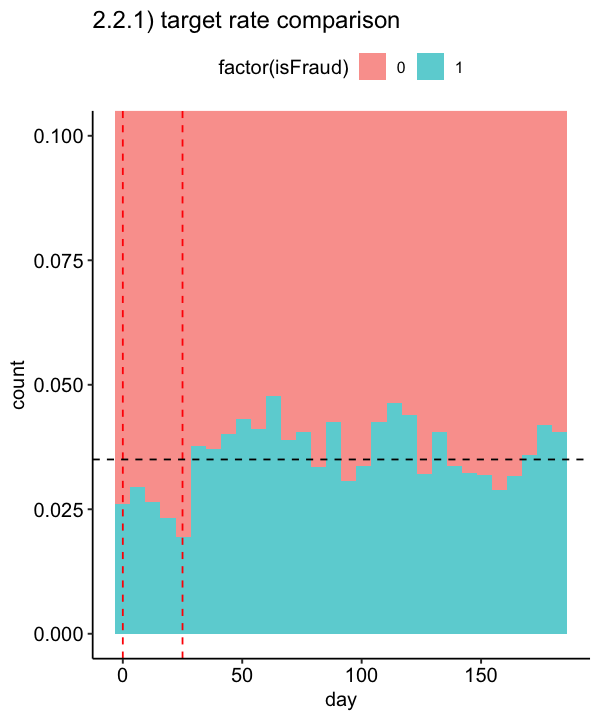

In [20]:
tr$day  <- tr$TransactionDT / 60 / 60 / 24
options(repr.plot.width = 5, repr.plot.height = 6)
ggplot(tr, aes(day, fill = factor(isFraud))) + geom_histogram(bins = 30, position = 'fill', alpha = 0.7) +
geom_vline(xintercept = 0, colour="red", linetype = "dashed") +
geom_vline(xintercept = 25, colour="red", linetype = "dashed") +
coord_cartesian( ylim = c(0, 0.1)) +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed") +
ggtitle("2.2.1) target rate comparison")

빨간색 점선 내 부분(peak 구간)에서의 fraud rate은 평균(검은색 dot)보다 오히려 낮았다.

(해당 구간이 유의미하게 다른 구간과 차이가 나는지 통계적인 검증 필요)

2.2.1.1) **0~25일 기간만 특수하게/일회성으로 발생 and fraud가 아닌 transaction들이 있지않을까?**

### 3. transactionAmt

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


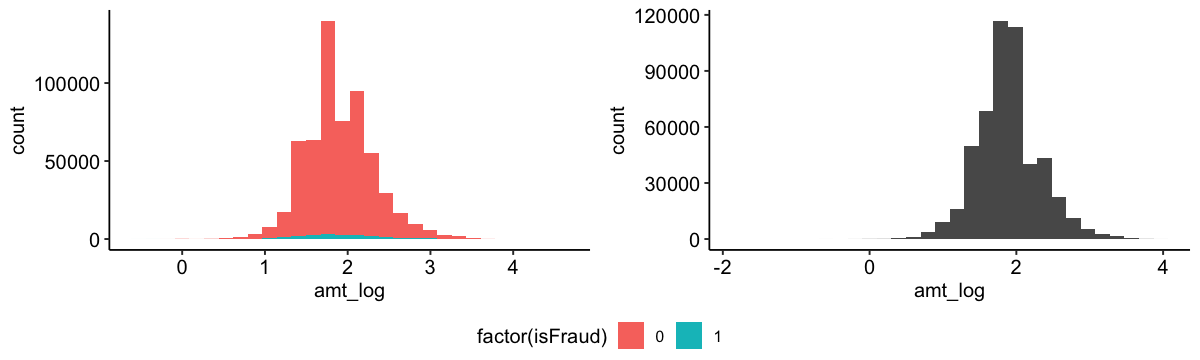

In [21]:
options(repr.plot.width = 5, repr.plot.height = 3)
a1 <- ggplot(tr, aes(TransactionAmt, fill = factor(isFraud))) + geom_histogram()

tr$amt_log  <- log10(tr$TransactionAmt)
te$amt_log  <- log10(te$TransactionAmt)
a1 <- ggplot(tr, aes(amt_log, fill = factor(isFraud))) + geom_histogram()
b1 <- ggplot(te, aes(amt_log)) + geom_histogram()

options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 2)
figure

딱히 특별한 패턴은 없는...

### 4. ProductCD

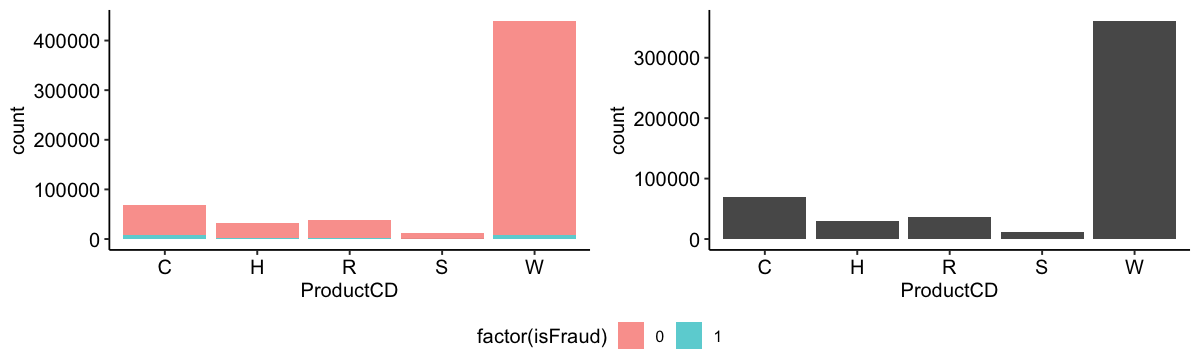

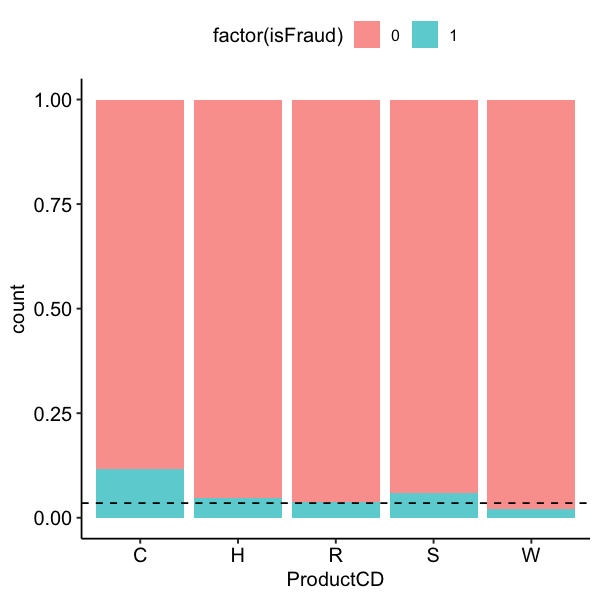

In [22]:
a1 <- ggplot(tr, aes(ProductCD, fill = factor(isFraud))) + geom_bar(alpha = 0.7)
b1 <- ggplot(te, aes(ProductCD)) + geom_bar()

options(repr.plot.width = 10, repr.plot.height = 3)
figure <- ggarrange(a1, b1,
                    common.legend = TRUE, legend = "bottom",
                    nrow = 1, ncol = 2)
figure


options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(tr, aes(ProductCD, fill = factor(isFraud))) + geom_bar(alpha =0.7, position = 'fill') +
geom_hline(yintercept = 0.035, colour="black", linetype="dashed")

"C" 항목이 다른 항목들에 비해 fraud ratio 비율이 월등히 높았다. 4.1) C 항목이 다른 항목과 다른 특이점을 찾자,.

### 5. card1 ~ card6